# Feature Selection

In [16]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

In [4]:
# Import Cleaned Dataset
df = pd.read_csv('../Datasets/career_avgs.csv')
df.head()

,PLAYER_ID,GP,REB,AST,STL,BLK,TOV,PTS,FG_PCT,3_PCT,FT_PCT,PLAYER_NAME
0,1630173,394,5.8,1.0,0.6,0.7,1.0,7.6,0.488,0.297,0.608,Precious Achiuwa
1,203500,769,8.0,1.5,0.8,0.9,1.4,8.8,0.586,0.059,0.535,Steven Adams
2,1628389,573,8.9,3.6,1.1,0.9,2.2,15.8,0.535,0.317,0.758,Bam Adebayo
3,1630534,286,2.8,1.2,0.6,0.5,0.8,7.2,0.440,0.336,0.713,Ochai Agbaji
4,1630583,242,5.3,1.9,0.6,0.6,0.9,9.8,0.458,0.344,0.684,Santi Aldama


5.014745321394485
2.6926246830223532
0.12755977403084376
0.17184101852910014
0.5554011755585139
32.59644688520236
0.007489180222178139
0.008648295183996688
0.011713417063137754


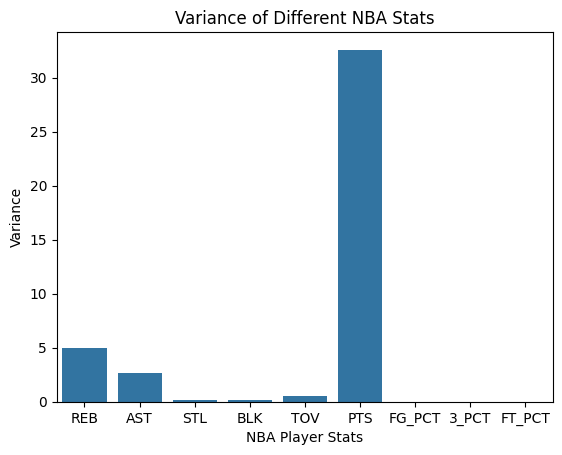

In [5]:
# Feature Selection using Variance Threshold
numeric_data = df.loc[:, "REB": "FT_PCT"]
variance_array = np.empty(numeric_data.shape[1])

for i in range(numeric_data.shape[1]):
    variance_array[i] = np.var(numeric_data.iloc[:, i])
    print(variance_array[i])

sns.barplot(x= numeric_data.columns, y= variance_array)
plt.xlabel('NBA Player Stats')
plt.ylabel('Variance')
plt.title('Variance of Different NBA Stats')
plt.show()

In [6]:
# Scaling the Features using standardization

scaler = StandardScaler().fit(df.loc[:, "REB": "FT_PCT"])
np_standardized = scaler.fit_transform(df.loc[:, "REB": "FT_PCT"])
np_standardized_df = pd.DataFrame(data= np_standardized, columns= df.loc[:, "REB": "FT_PCT"].columns).fillna(0)
np_standardized_df.head()


,REB,AST,STL,BLK,TOV,PTS,FG_PCT,3_PCT,FT_PCT
0,0.950324,-0.602345,-0.143686,0.669008,-0.143380,-0.236932,0.365784,-0.198159,-1.327828
1,1.932746,-0.297638,0.416295,1.151474,0.393351,-0.026750,1.498207,-2.757403,-2.002327
2,2.334646,0.982130,1.256266,1.151474,1.466813,1.199313,0.908885,0.016903,0.058128
3,-0.389343,-0.480462,-0.143686,0.186542,-0.411745,-0.306993,-0.188873,0.221213,-0.357659
4,0.727046,-0.053873,-0.143686,0.427775,-0.277563,0.148402,0.019123,0.307238,-0.625611


<Axes: xlabel='Principal Component 1', ylabel='Principal Component 2'>

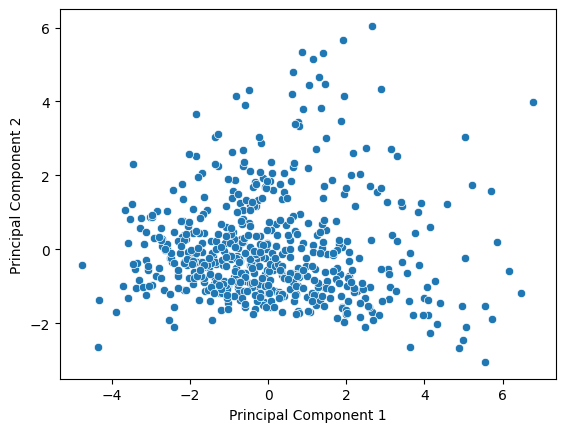

In [7]:
pca = PCA(n_components=2)

principal_components = pca.fit_transform(np_standardized_df)

principal_df = pd.DataFrame(data= principal_components, columns= ['Principal Component 1', 'Principal Component 2'])

principal_df

sns.scatterplot(x= 'Principal Component 1', y= 'Principal Component 2', data = principal_df)

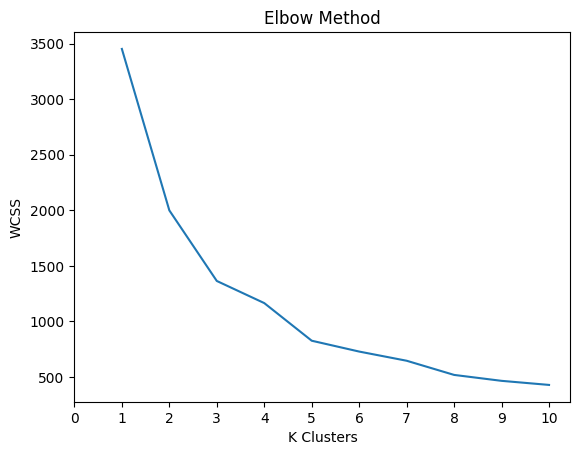

In [8]:
# Performing the Elbow Method to determine the best number of clusters

WCSS = []
for i in range(1,11):
    kmeans= KMeans(n_clusters= i)
    kmeans.fit_transform(principal_df)
    WCSS.append(kmeans.inertia_)

WCSS
plt.plot(range(1,11), WCSS)
plt.xticks(np.arange(0,11,1))
plt.ylabel('WCSS')
plt.xlabel('K Clusters')
plt.title('Elbow Method')
plt.show()


In [9]:
# K Means Clustering

kmeans = KMeans(n_clusters = 5)
kmeans.fit_transform(principal_df)

array([[0.99339423, 2.87630315, 3.00630752, 4.77184826, 2.24050965],
       [1.33097979, 4.59466354, 5.16541404, 5.38163634, 4.54123322],
       [3.35053125, 2.78038489, 6.048296  , 1.794124  , 4.35257279],
       ...,
       [3.62813768, 2.15045034, 1.93054523, 4.92615683, 0.41465131],
       [3.78193533, 3.18354292, 0.86131529, 5.93771532, 1.15299562],
       [3.14311319, 1.1473562 , 2.82070344, 3.89319351, 0.89792733]],
      shape=(569, 5))

In [10]:
clustered_df = df.copy()
clustered_df['Clusters'] = kmeans.labels_
clustered_df_group = clustered_df.drop(['PLAYER_ID', 'GP', 'PLAYER_NAME'], axis = 1).groupby('Clusters').mean()
clustered_df_group.head()

,REB,AST,STL,BLK,TOV,PTS,FG_PCT,3_PCT,FT_PCT
Clusters,,,,,,,,,
0,6.148837,1.186047,0.560465,1.002326,1.034884,8.441860,0.574023,0.221013,0.667163
1,4.162393,3.217949,0.941880,0.394017,1.620513,13.224786,0.447726,0.355154,0.795829
2,1.459664,0.613445,0.268908,0.147059,0.361345,2.731092,0.396000,0.265664,0.705200
3,6.578000,5.330000,1.202000,0.732000,2.720000,20.720000,0.478960,0.348000,0.799000
4,2.897970,1.590863,0.609645,0.274619,0.874112,7.410152,0.440497,0.350633,0.776381


In [11]:
cluster_meaning = { 0 : "2 Way Rim Attacker", 1 : "Bench Rider", 2 : "Defensive Big", 3 : "Defensive 3 Point Shooter", 4 : "All Star" } 
clustered_df['Clusters'] = clustered_df['Clusters'].replace(cluster_meaning)
clustered_df.head()

,PLAYER_ID,GP,REB,AST,STL,BLK,TOV,PTS,FG_PCT,3_PCT,FT_PCT,PLAYER_NAME,Clusters
0,1630173,394,5.8,1.0,0.6,0.7,1.0,7.6,0.488,0.297,0.608,Precious Achiuwa,2 Way Rim Attacker
1,203500,769,8.0,1.5,0.8,0.9,1.4,8.8,0.586,0.059,0.535,Steven Adams,2 Way Rim Attacker
2,1628389,573,8.9,3.6,1.1,0.9,2.2,15.8,0.535,0.317,0.758,Bam Adebayo,Defensive 3 Point Shooter
3,1630534,286,2.8,1.2,0.6,0.5,0.8,7.2,0.440,0.336,0.713,Ochai Agbaji,All Star
4,1630583,242,5.3,1.9,0.6,0.6,0.9,9.8,0.458,0.344,0.684,Santi Aldama,All Star


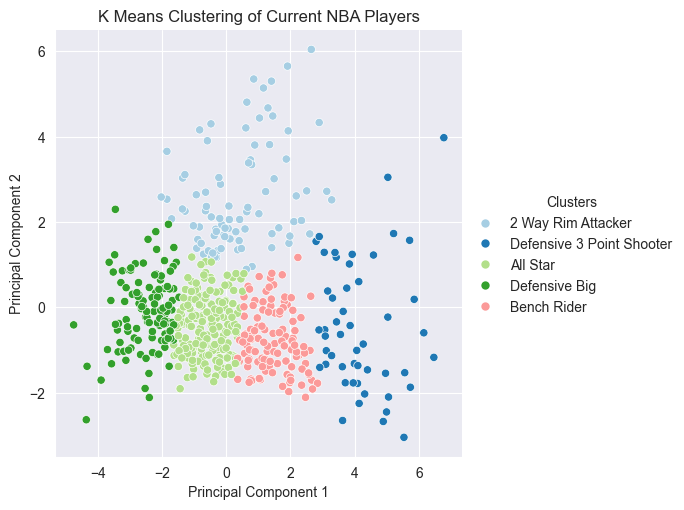

In [13]:
sns.set_style('darkgrid')
sns.set_palette('Paired')
sns.relplot(x= 'Principal Component 1', y= 'Principal Component 2',  data= principal_df, hue = clustered_df['Clusters'])
plt.title('K Means Clustering of Current NBA Players')
plt.show()

In [ ]:
principal_df['Clusters'] = clustered_df['Clusters']
KNN = KNeighborsClassifier(3)

,Principal Component 1,Principal Component 2,Clusters
0,-0.076682,1.690504,2 Way Rim Attacker
1,0.888715,3.802615,2 Way Rim Attacker
2,3.425321,1.175199,Defensive 3 Point Shooter
3,-0.725519,0.135301,All Star
4,0.205048,0.695149,All Star
